# Tutorial on spectractor.extractor.dispersers

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import re

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
print('workbookDir: ' + workbookDir)
#os.chdir(workbookDir)  # If you changed the current working dir, this will take you back to the workbook dir.

workbookDir: /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/notebooks


In [5]:
import sys
sys.path.append(workbookDir)
sys.path.append(os.path.dirname(workbookDir))

In [6]:
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.logbook import LogBook
from spectractor.extractor.dispersers import *

# Ronchi in not rotated image

In [7]:
ronchi=Grating(N=145,D=200)

In [8]:
x0=[218.921,233.614] # position of star in pixel coordinates

In [9]:
deltaX=np.arange(0,2048,1).astype(float)

In [10]:
lambdas=ronchi.grating_pixel_to_lambda(deltaX,x0,order=1)

Text(0, 0.5, 'wavelength (nm)')

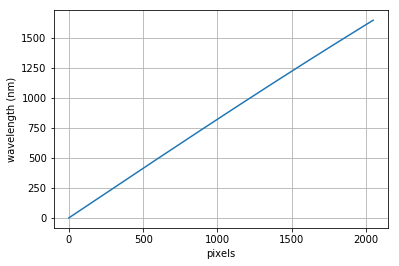

In [11]:
plt.plot(deltaX,lambdas)
plt.grid()
plt.xlabel("pixels")
plt.ylabel("wavelength (nm)")

In [12]:
resolu=ronchi.grating_resolution(deltaX,x0)

Text(0, 0.5, 'wavelength resolution (nm)')

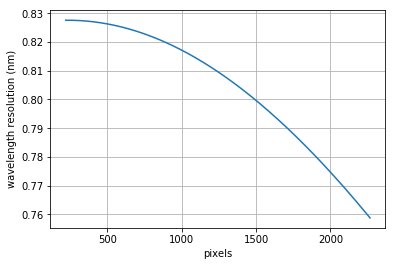

In [13]:
plt.plot(deltaX+x0[0],resolu)
plt.grid()
plt.xlabel("pixels")
plt.ylabel("wavelength resolution (nm)")

In [14]:
g=Grating(145,label='Ron145test')

In [15]:
g.N_input

145

In [16]:
print(g.theta_tilt)

0


# Hologram test

In [17]:
x0= np.array([232.513,1444.024]) # order 0 position

In [18]:
x1=np.array([x0[0]+20./0.0135,x0[1]]) # order 1 position in pixel

In [19]:
h=Hologram(label="holo150test")

In [20]:
hologram=build_hologram(x0,x1,0,lambda_plot=639000)

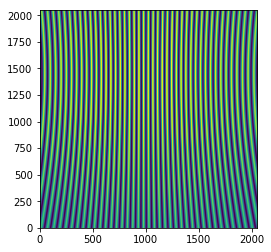

In [21]:
plt.imshow(hologram,origin="lower")

In [22]:
hologram.shape

(2048, 2048)

In [23]:
#build_hologram?

# Disperser Hologram

Ny;Nx= 2896, 2500, x0,y0= 494, 1395 and ymin, ymax= 1365, 1425

In [24]:
Nx=2500
Ny=2896
x0=494
y0=1395
ymin=1365
ymax=1425
right_edge=2500

In [25]:
target_pixcoords_rotated=np.array([x0,y0])

In [26]:
hpdm=Hologram("Holo150PDM19", D=parameters.DISTANCE2CCD,
                                  data_dir=parameters.HOLO_DIR, verbose=parameters.VERBOSE)

In [27]:
lambdas=hpdm.grating_pixel_to_lambda(np.arange(Nx) - target_pixcoords_rotated[0],
                                                          x0=target_pixcoords_rotated,order=1)

Text(0, 0.5, 'wavelength (nm)')

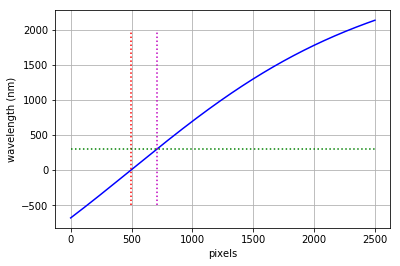

In [28]:
plt.plot(np.arange(Nx),lambdas,'b-')
plt.plot([x0,x0],[-500,2000],"r:")
plt.plot([708,708],[-500,2000],"m:")
plt.plot([0,2500],[300,300],"g:")
plt.grid()
plt.xlabel("pixels")
plt.ylabel("wavelength (nm)")

In [29]:
 pixel_start = int(np.argmin(np.abs(lambdas - (parameters.LAMBDA_MIN - 0))))

In [30]:
 pixel_start

708

In [31]:
pixel_end = min(right_edge, int(np.argmin(np.abs(lambdas - (parameters.LAMBDA_MAX + 0)))))

In [32]:
pixel_end

1324